Found 1349 images belonging to 8 classes.
Found 335 images belonging to 8 classes.
Class indices: {'Gogh': 0, 'Monet': 1, 'Rembrandt': 2, 'Derain': 3, 'Marca': 4, 'Orlowski': 5, 'Savrosov': 6, 'Seurat': 7}
Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.3581 - loss: 1.8463 - val_accuracy: 0.4627 - val_loss: 1.7816
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4322 - loss: 1.5498 - val_accuracy: 0.4627 - val_loss: 1.8126
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.4929 - loss: 1.5139 - val_accuracy: 0.4776 - val_loss: 1.7604
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4451 - loss: 1.4677 - val_accuracy: 0.4955 - val_loss: 1.6417
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5385 - loss: 1.3584 - val_accuracy: 0.5373 - val_loss: 1.6038
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4963 - loss: 1.3418 - val_accuracy: 0.5313 - val_loss: 1.5124
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 

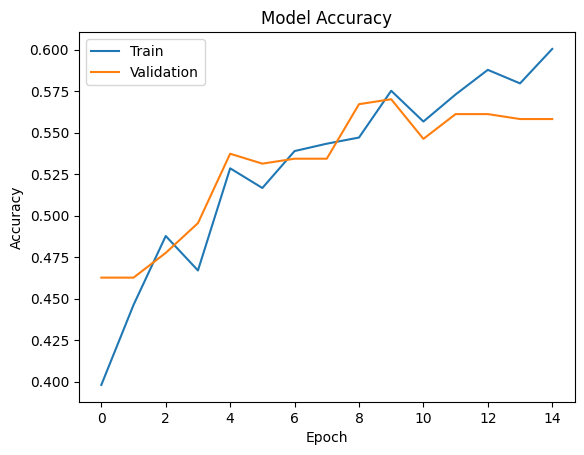

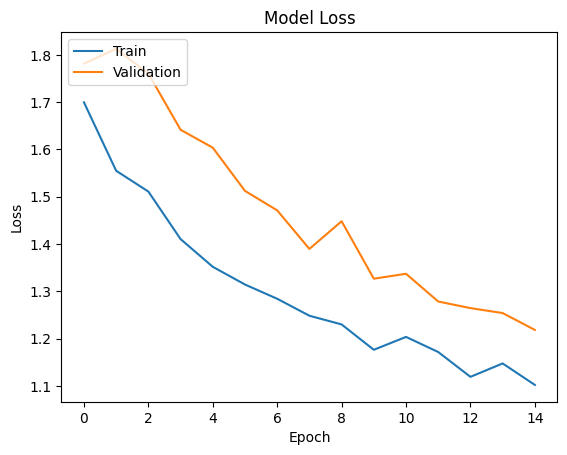

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Path to the dataset (download and unzip from google drive link on github)
base_dir = r"C:\Users\willk\.cache\kagglehub\datasets\steubk\wikiart\versions\1\selected_artists"


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

classes = ['Gogh', 'Monet', 'Rembrandt', 'Derain', 'Marca', 'Orlowski', 'Savrosov', 'Seurat']

train_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=classes
)

val_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=classes
)

print("Class indices:", train_data.class_indices)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(classes), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    verbose=1
)

model.save("artist_classifier_optimized.h5")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
